In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn
import pandas as pd
import pickle
%matplotlib inline

In [8]:
validityMaps = pickle.load(open('validityMaps.pickle', 'r'))
validityBoundaries = pickle.load(open('validityBoundaries.pickle', 'r'))
partitions = pickle.load(open('partitions.pickle', 'r'))
delaySteps = pickle.load(open('delaySteps.pickle', 'r'))
numFlights = pickle.load(open('numFlights.pickle', 'r'))
numConflicts = pickle.load(open('numConflicts.pickle', 'r'))

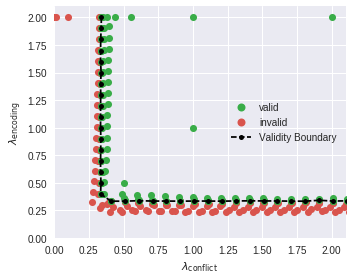

In [9]:
pdf = matplotlib.backends.backend_pdf.PdfPages('validity_boundary_example.pdf');
fig = plt.figure(figsize=(5, 4));
pw1='unique'
pw2='conflict'
n = partitions.index(40)
for i in [1]:
    ax = fig.add_subplot(1, 1, 1)
    p = partitions[n]
    d = delaySteps[i]
    f = numFlights[p]
    c = numConflicts[p]
    ax.set_xlim(0, 2.1)
    ax.set_ylim(0, 2.1)
    validityMap = validityMaps[(p, d)]
    validityBoundary = validityBoundaries[(p, d)]
    invalid = validityMap[validityMap['isValid'] == False]
    ax.scatter(invalid['penalty-weight-conflict'], invalid['penalty-weight-unique'], c=seaborn.xkcd_rgb["pale red"], linewidth=0, s=50)
    valid = validityMap[validityMap['isValid'] == True]
    ax.scatter(valid['penalty-weight-%s' % pw2], valid['penalty-weight-%s' % pw1], c=seaborn.xkcd_rgb["medium green"], linewidth=0, s=50)
    ax.plot(validityBoundary['penalty-weight-%s' % pw2], validityBoundary['penalty-weight-%s' % pw1], marker='o', linestyle='--', markersize=5, c='k')
   
    ax.set_xlabel('$\lambda_\mathrm{conflict}}$')
    ax.set_ylabel('$\lambda_\mathrm{encoding}}$')
    #ax.set_title('Partition 41, $\Delta d =3, d_{max} = 18$')
    labels = []
    labels.append(matplotlib.lines.Line2D([], [], color=seaborn.xkcd_rgb["medium green"], marker='o', markersize=8, linewidth=0, label='valid'))
    labels.append(matplotlib.lines.Line2D([], [], color=seaborn.xkcd_rgb["pale red"], marker='o', markersize=8, linewidth=0, label='invalid'))
    labels.append(matplotlib.lines.Line2D([], [], color='k', linestyle='--', marker='o', markersize=5, label='Validity Boundary'))

    ax.legend(handles=labels, loc='best');
plt.tight_layout()
pdf.savefig(figure=fig)
pdf.close();